## ML_Fall24 Review Exercise 2 Due at Mid-night 9/24/24 11:59 pm

### This Review Exercise will cover the following skills set
* Using sql 
* Checking for null values and outliers
* Calculate simple statistics using both SQL and Pandas 
* Calculate skew and correlation
* Basic Data Visualization
* How to fix missing values
* Build simple linear regression model

In [5]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

**Make sure you have pandasql installed. If not, make sure you run the code in the following cell**

In [6]:
import os
try:
    import pandasql as ps
except:
    print("Failed in import pandasql")
    os.system("pip install pandasql")

Failed in import pandasql


**Import all standard libaries**

In [7]:
import pandas as pd
import pandasql as ps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'pandasql'

## Loading Salary dataset ##

In [8]:
salary = pd.read_csv("data/Salaries2.csv")
print(salary.shape)
salary.corr()
salary.head()

(403, 6)


ValueError: could not convert string to float: 'Prof'

In [5]:
salary.describe()

,YrsSincePhd,YrsOfService,Salary
count,402.000000,402.000000,4.030000e+02
mean,22.258706,17.684080,1.160301e+05
std,12.870455,13.571541,5.398971e+04
min,1.000000,0.000000,5.780000e+04
25%,12.000000,7.000000,9.116350e+04
50%,21.000000,16.000000,1.073090e+05
75%,32.000000,26.000000,1.343675e+05
max,56.000000,101.000000,1.012100e+06


In [6]:
salary.shape

(403, 6)

## Question 1. Check if there are any null or NA

In [7]:
salary.isnull().any()

Rank            False
Discipline      False
YrsSincePhd      True
YrsOfService     True
Sex              True
Salary          False
dtype: bool

## Question 2. Remove any rows that has null or NA

In [8]:
df2 = salary[ ~np.isnan(salary.YrsSincePhd)]
df2 = df2[ ~np.isnan(df2.YrsOfService)]
df2 = df2[ ~pd.isnull(df2.Sex)]
df2.shape

(399, 6)

In [9]:
print(df2.isnull().any())

Rank            False
Discipline      False
YrsSincePhd     False
YrsOfService    False
Sex             False
Salary          False
dtype: bool


## Question 3. Check if there is any outliers in all numerical fields using both scatter and boxplot

### Numercial Fields: YrsSincePhd, YrsOfService, Salary


<Axes: xlabel='User', ylabel='YrsSincePhd'>

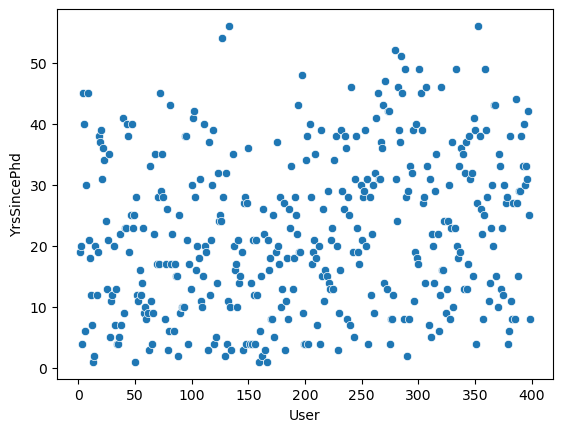

In [10]:
df2['User'] = range(1, len(df2)+1) #Setting up the amount of users, for X
sns.scatterplot(x = 'User', y = 'YrsSincePhd', data=df2) #Displays scatterplot for User and YrsSincePhd

<Axes: ylabel='YrsSincePhd'>

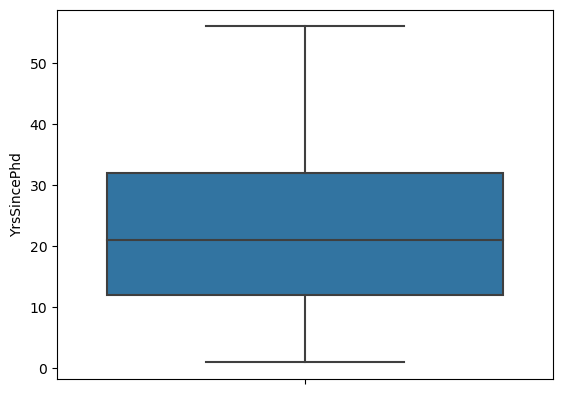

In [11]:
sns.boxplot(y=df2['YrsSincePhd'])

<Axes: xlabel='User', ylabel='YrsOfService'>

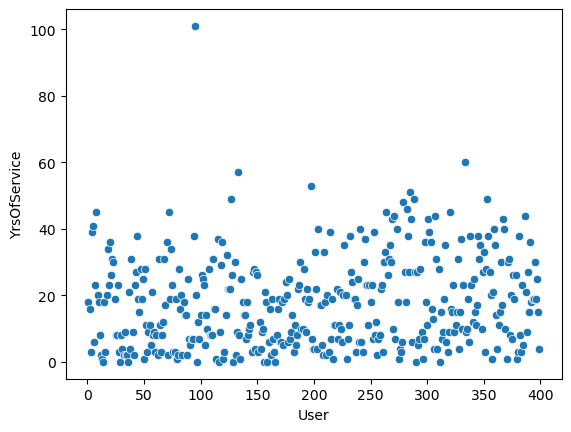

In [12]:
sns.scatterplot(x = 'User', y = 'YrsOfService', data=df2)

<Axes: ylabel='YrsOfService'>

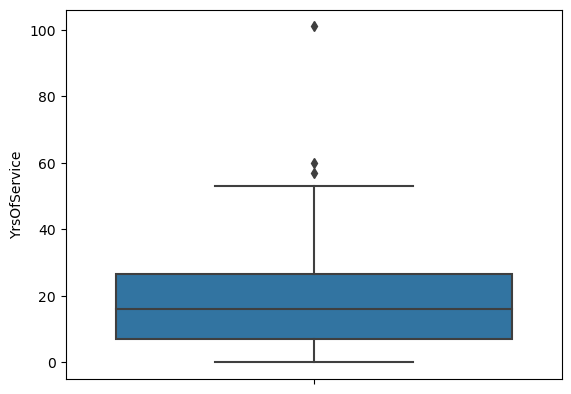

In [13]:
sns.boxplot(y=df2['YrsOfService'])

<Axes: xlabel='User', ylabel='Salary'>

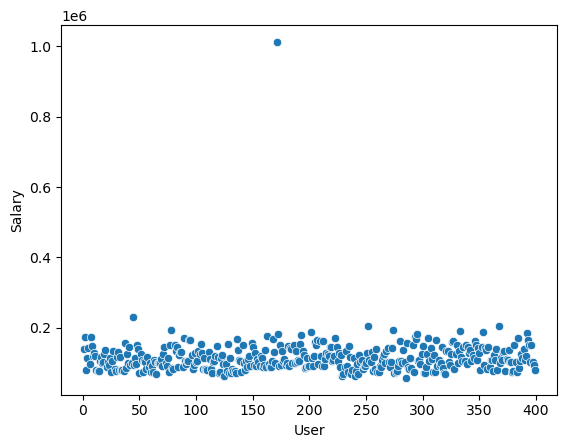

In [14]:
sns.scatterplot(x = 'User', y = 'Salary', data=df2)

<Axes: ylabel='Salary'>

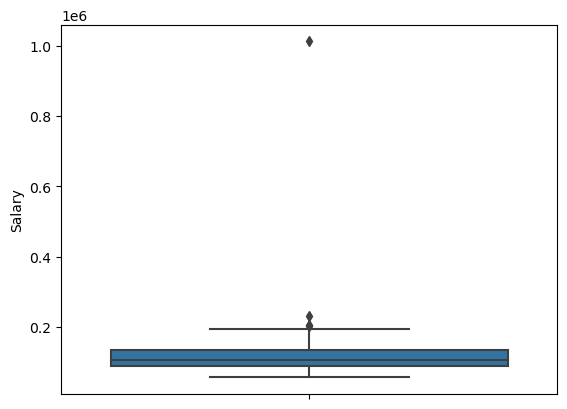

In [15]:
sns.boxplot(y=df2['Salary'])

## Question 4. Display and Remove (the real) outliers

<Axes: xlabel='User', ylabel='Salary'>

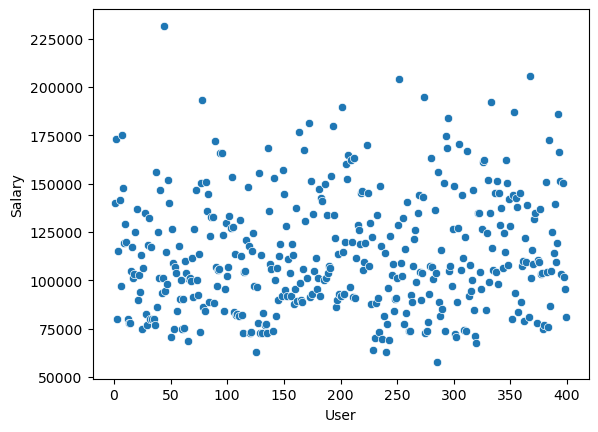

In [16]:
df2 = df2[ df2['Salary'] <= 500000]
sns.scatterplot(x='User', y = 'Salary', data=df2)

<Axes: xlabel='User', ylabel='YrsOfService'>

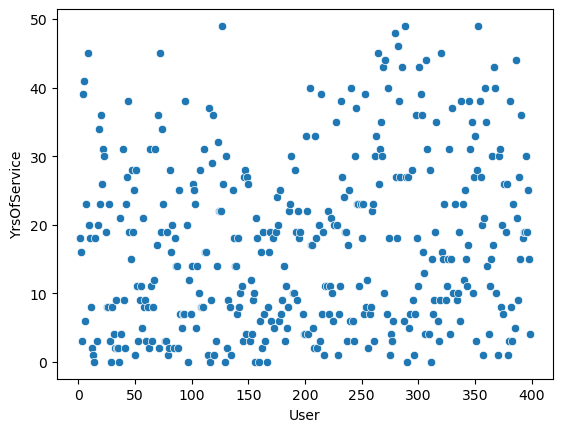

In [17]:
df2 = df2[ df2['YrsOfService'] <= 50]
sns.scatterplot(x='User', y = 'YrsOfService', data=df2)

## Question 5. Calculate the count and average salary by Rank using SQL. Does the result make sense?

In [18]:
sql ="select rank, count(*), avg(salary) from salary group by rank"
df = ps.sqldf(sql)
df

,Rank,count(*),avg(salary)
0,AssocProf,67,107758.283582
1,AsstProf,67,80775.985075
2,Prof,269,126871.115242


## Question 6. Answer the above same question using Pandas

In [19]:
newval = df2['Salary']
stats = newval.describe()

stats_formatted = stats.apply(lambda x: f"{x:,.2f}")
print(stats_formatted)

count        393.00
mean     113,752.39
std       29,920.30
min       62,884.00
25%       91,227.00
50%      107,309.00
75%      134,000.00
max      231,545.00
Name: Salary, dtype: object


## Question 7. Do a boxplot of Salary by Rank. Comment on the results

<Axes: xlabel='Rank', ylabel='Salary'>

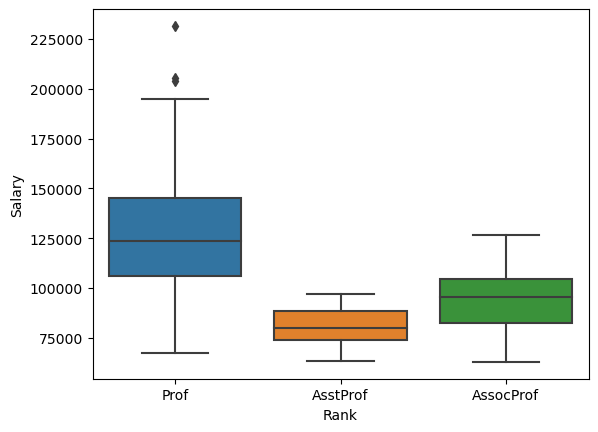

In [20]:
sns.boxplot(x='Rank', y='Salary', data=df2)

## Question 8. Calculate correlation among the nuermical attributes, find out which variables have the highest correlation with Salary

In [21]:
salary.corr()

,YrsSincePhd,YrsOfService,Salary
YrsSincePhd,1.000000,0.882785,0.189557
YrsOfService,0.882785,1.000000,0.154668
Salary,0.189557,0.154668,1.000000


## Question 9. Calculate the Standard deviation, Skew and Kurtosis for the YrsSincePhd, YrsOfService, Salary by Rank. Comment on the results.

In [22]:
var = 'YrsSincePhd'
series = df2[var]

print("Mean: {}".format(series.mean()))
print("Stdev: {}".format(series.std()))
print("Min: {}".format(series.min()))
print("Max: {}".format(series.max()))
print("Median: {}".format(series.median()))
print("Mode: {}".format(series.mode()))
print("Skew: {}".format(series.skew()))
print("Kurtosis: {}".format(series.kurtosis()))


Mean: 21.966921119592875
Stdev: 12.599255927835127
Min: 1.0
Max: 56.0
Median: 21.0
Mode: 0    4.0
Name: YrsSincePhd, dtype: float64
Skew: 0.2786551060224391
Kurtosis: -0.8355823783361824


In [23]:
var = 'YrsOfService'
series = df2[var]

print("Mean: {}".format(series.mean()))
print("Stdev: {}".format(series.std()))
print("Min: {}".format(series.min()))
print("Max: {}".format(series.max()))
print("Median: {}".format(series.median()))
print("Mode: {}".format(series.mode()))
print("Skew: {}".format(series.skew()))
print("Kurtosis: {}".format(series.kurtosis()))

Mean: 17.173027989821882
Stdev: 12.457297887376166
Min: 0.0
Max: 49.0
Median: 16.0
Mode: 0    3.0
Name: YrsOfService, dtype: float64
Skew: 0.5550310002615625
Kurtosis: -0.6196142884559608


In [24]:
var = 'Salary'
series = df2[var]

print("Mean: {}".format(series.mean()))
print("Stdev: {}".format(series.std()))
print("Min: {}".format(series.min()))
print("Max: {}".format(series.max()))
print("Median: {}".format(series.median()))
print("Mode: {}".format(series.mode()))
print("Skew: {}".format(series.skew()))
print("Kurtosis: {}".format(series.kurtosis()))

Mean: 113752.38676844783
Stdev: 29920.30182090599
Min: 62884
Max: 231545
Median: 107309.0
Mode: 0    92000
Name: Salary, dtype: int64
Skew: 0.7156886985227456
Kurtosis: 0.2398589025627058


## Question 10. Build a linear regression model in predicting the salary using the variable that has the highest correlation

In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#Need a 2D numpy array, so call reshape (-1, 1)
X = df2['YrsSincePhd'].values.reshape(-1,1)
Y = df2['Salary'].values.reshape(-1,1)

model.fit(X, Y) #fitting the model

LinearRegression()

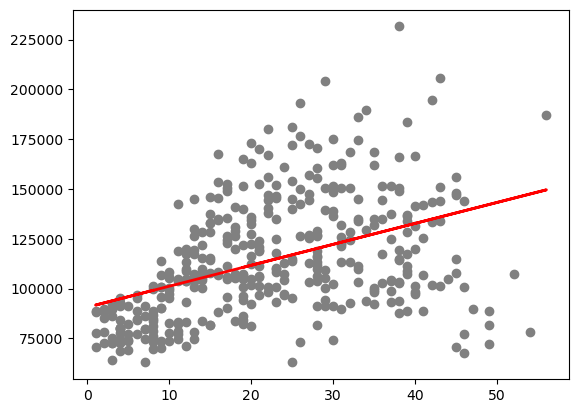

Model intercept: [90646.21871028]
Model coefficient: [[1051.8619306]]


In [43]:
# now make the prediction
Y_pred = model.predict(X)
plt.scatter(X, Y,  color='gray')
plt.plot(X, Y_pred, color='red', linewidth=2)
plt.show()

print("Model intercept: {}".format(model.intercept_))
print("Model coefficient: {}".format(model.coef_))

# Question 11: Now investigate how the categorical variables affect the salary by using a FacetGrid with scatter plot of salary against each categorical variables (rank, sex and discipline). Comment on the results (such as under which categorical variable the above linear regression model would work better)

In [28]:
df2.head()

,Rank,Discipline,YrsSincePhd,YrsOfService,Sex,Salary,User
0,Prof,B,19.0,18.0,Male,139750,1
1,Prof,B,20.0,16.0,Male,173200,2
2,AsstProf,B,4.0,3.0,Male,79750,3
3,Prof,B,45.0,39.0,Male,115000,4
4,Prof,B,40.0,41.0,Male,141500,5


In [29]:
df2['Rank'].unique()

array(['Prof', 'AsstProf', 'AssocProf'], dtype=object)

In [30]:
df2['Discipline'].unique()

array(['B', 'A'], dtype=object)

In [31]:
df2['Sex'].unique()

array(['Male', 'Female'], dtype=object)

In [32]:
df2.groupby(['Rank']).describe()

YrsSincePhd                                                     \
                count       mean       std   min   25%   50%   75%   max   
Rank                                                                       
AssocProf        63.0  14.936508  8.793093   6.0  10.0  12.0  17.0  49.0   
AsstProf         67.0   5.104478  2.541381   1.0   3.5   4.0   7.0  11.0   
Prof            263.0  27.946768  9.853363  11.0  20.0  28.0  36.0  56.0   

          YrsOfService             ...    Salary             User              \
                 count       mean  ...       75%       max  count        mean   
Rank                               ...                                          
AssocProf         63.0  11.301587  ...  104331.5  126431.0   63.0  180.841270   
AsstProf          67.0   2.373134  ...   88597.5   97032.0   67.0  170.865672   
Prof             263.0  22.349810  ...  145014.0  231545.0  263.0  211.958175   

                                                        
                  std  min    25%    50%    75%    max  
Rank                                                    
AssocProf  104.309590  6.0  102.0  170.0  259.0  385.0  
AsstProf   112.885420  3.0   77.5  156.0  258.5  399.0  
Prof       117.526715  1.0  109.0  224.0  313.5  398.0  

[3 rows x 32 columns]

In [33]:
print(f'Standard Deviation:\n{df2.groupby(["Rank"])["Salary"].std()}\n')
print(f'Mean:\n{df2.groupby(["Rank"])["Salary"].mean()}\n')
print(f'Skew:\n{df2.groupby(["Rank"])["Salary"].skew()}\n')

Standard Deviation:
Rank
AssocProf    13933.967378
AsstProf      8174.112637
Prof         27030.353684
Name: Salary, dtype: float64

Mean:
Rank
AssocProf     93937.968254
AsstProf      80775.985075
Prof         126899.638783
Name: Salary, dtype: float64

Skew:
Rank
AssocProf   -0.098737
AsstProf     0.082975
Prof         0.659425
Name: Salary, dtype: float64



In [34]:
print(f'Standard Deviation:\n{df2.groupby(["Discipline"])["Salary"].std()}\n')
print(f'Mean:\n{df2.groupby(["Discipline"])["Salary"].mean()}\n')
print(f'Skew:\n{df2.groupby(["Discipline"])["Salary"].skew()}\n')

Standard Deviation:
Discipline
A    30376.410986
B    29012.443236
Name: Salary, dtype: float64

Mean:
Discipline
A    109009.083799
B    117719.915888
Name: Salary, dtype: float64

Skew:
Discipline
A    0.863120
B    0.665098
Name: Salary, dtype: float64



In [35]:
print(f'Standard Deviation:\n{df2.groupby(["Sex"])["Salary"].std()}\n')
print(f'Mean:\n{df2.groupby(["Sex"])["Salary"].mean()}\n')
print(f'Skew:\n{df2.groupby(["Sex"])["Salary"].skew()}\n')

Standard Deviation:
Sex
Female    25952.127317
Male      30028.132174
Name: Salary, dtype: float64

Mean:
Sex
Female    101002.410256
Male      115157.045198
Name: Salary, dtype: float64

Skew:
Sex
Female    0.458032
Male      0.726578
Name: Salary, dtype: float64



In [36]:
print(f'Kurtosis for Rank and Salary:\n{df2.groupby(["Rank"])["Salary"].apply(pd.DataFrame.kurtosis)}\n')
print(f'Kurtosis for Discipline and Salary:\n{df2.groupby(["Discipline"])["Salary"].apply(pd.DataFrame.kurtosis)}\n')
print(f'Kurtosis for Sex and Salary:\n{df2.groupby(["Sex"])["Salary"].apply(pd.DataFrame.kurtosis)}\n')

Kurtosis for Rank and Salary:
Rank
AssocProf   -0.617567
AsstProf    -0.920936
Prof         0.419118
Name: Salary, dtype: float64

Kurtosis for Discipline and Salary:
Discipline
A    0.431540
B    0.272066
Name: Salary, dtype: float64

Kurtosis for Sex and Salary:
Sex
Female   -0.605711
Male      0.223203
Name: Salary, dtype: float64



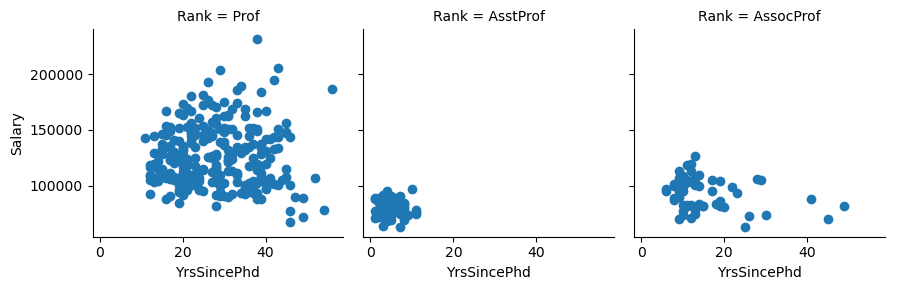

In [37]:
g = sns.FacetGrid(df2, col = 'Rank')
g = (g.map(plt.scatter, 'YrsSincePhd', 'Salary').add_legend())

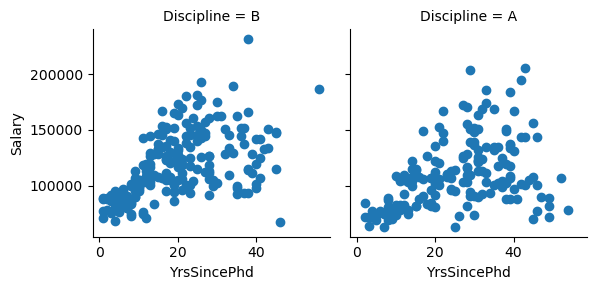

In [38]:
g = sns.FacetGrid(df2, col = 'Discipline')
g = (g.map(plt.scatter, 'YrsSincePhd', 'Salary').add_legend())

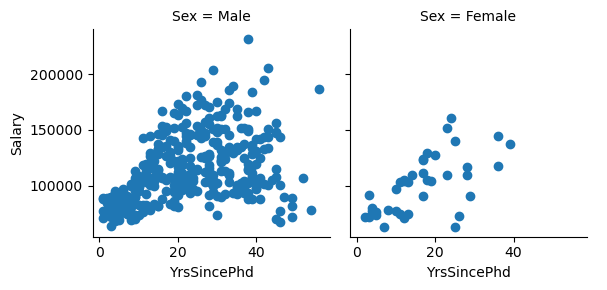

In [39]:
g = sns.FacetGrid(df2, col = 'Sex')
g = (g.map(plt.scatter, 'YrsSincePhd', 'Salary').add_legend())